In [23]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
import math

sys.path.insert(0, '/home/bay001/projects/codebase/rbp-maps/maps/')
from pandas.util.testing import assert_frame_equal
from density import ReadDensity
from density import normalization_functions as norm
from density import matrix_functions as mtx
from density import intervals
from density import Feature
from density import Map

In [24]:
pd.set_option('max_colwidth', 1000)
pd.set_option('display.max_rows', 1500)

wd = '/home/bay001/projects/codebase/rbfox2/'

regions = os.path.join(
    wd,
    'RBFOX2-BGHLV26-HepG2-SE.MATS.JunctionCountOnly.txt'
)

ip_bam = os.path.join(
    wd,
    '204_01_RBFOX2.merged.r2.bam'
)
input_bam = os.path.join(
    wd,
    'RBFOX2-204-INPUT_S2_R1.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.bam'
)

ip_pos_bw = os.path.join(
    wd,
    '204_01_RBFOX2.merged.r2.norm.neg.bw'
) # flipped?
ip_neg_bw = os.path.join(
    wd,
    '204_01_RBFOX2.merged.r2.norm.pos.bw'
) # flipped?
input_pos_bw = os.path.join(
    wd,
    'RBFOX2-204-INPUT_S2_R1.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.norm.neg.bw'
) # flipped?
input_neg_bw = os.path.join(
    wd,
    'RBFOX2-204-INPUT_S2_R1.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.norm.pos.bw'
) # flipped?

ip_read_density = ReadDensity.ReadDensity(
    pos = ip_pos_bw,
    neg = ip_neg_bw,
    bam = ip_bam
)

input_read_density = ReadDensity.ReadDensity(
    pos = input_pos_bw,
    neg = input_neg_bw,
    bam = input_bam
)

annotation_files = {'/home/bay001/projects/codebase/temp/RBFOX2-HepG2-SE-positive.txt':'rmats',
                    '/home/bay001/projects/codebase/temp/RBFOX2-HepG2-SE-negative.txt':'rmats'}

annotation_files = {'/projects/ps-yeolab3/bay001/maps/current_annotations/RBFOX2-BGHLV26-HepG2-SE.MATS.JunctionCountOnly.positive.nr.txt':'rmats',
                    '/projects/ps-yeolab3/bay001/maps/current_annotations/RBFOX2-BGHLV26-HepG2-SE.MATS.JunctionCountOnly.negative.nr.txt':'rmats'}
"""
annotation_files = {'/projects/ps-yeolab3/bay001/maps/current_annotations/RBFOX2-BGHLV26-HepG2-SE.MATS.JunctionCountOnly.positive.nr.txt':'rmats',
                    '/home/elvannostrand/data/ENCODE/RNAseq/Brent_RNASEQlist_fromDCC.tsv.file_accessions_HepG2.hg19_V19.20161207.tsv.strict_CE_0.8':'eric',
                    '/home/elvannostrand/data/ENCODE/RNAseq/Brent_RNASEQlist_fromDCC.tsv.file_accessions_HepG2.hg19_V19.20161207.tsv.nSE_0.5':'eric',
                    '/home/elvannostrand/data/ENCODE/RNAseq/Brent_RNASEQlist_fromDCC.tsv.file_accessions_HepG2.hg19_V19.20161207.tsv.aSE_0.1':'eric'}
"""
output_file = '/home/bay001/projects/codebase/example_outputs/rbfox2-rbpmap.svg'

se
create
norm
meansandsems


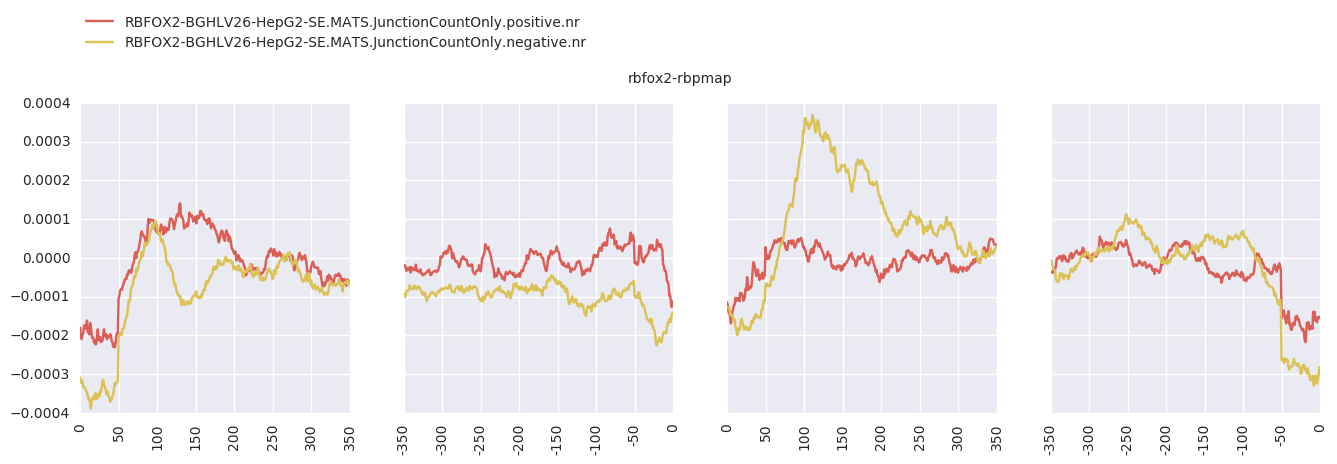

In [25]:
se = Map.SkippedExon(ip_read_density, input_read_density, output_file, 
                      norm.normalize_and_per_region_subtract, annotation_files,
                      exon_offset=50, intron_offset=300, min_density_threshold=0,
                      conf=0.95)
print('se')
se.create_matrices()
print('create')
se.normalize_matrix()
print('norm')
se.set_means_and_sems()
print('meansandsems')
se.write_intermediates_to_csv()
se.plot()

In [31]:
program = '/home/bay001/projects/codebase/rbp-maps/maps/plot_density.py'
ip_bam = os.path.join(wd,'204_01_RBFOX2.merged.r2.bam')
input_bam = os.path.join(wd,'RBFOX2-204-INPUT_S2_R1.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.bam')
output = '/projects/ps-yeolab3/bay001/maps/test/rbfox2.svg'
an = '/projects/ps-yeolab3/bay001/maps/current_annotations/RBFOX2-BGHLV26-HepG2-SE.MATS.JunctionCountOnly.positive.nr.txt /projects/ps-yeolab3/bay001/maps/current_annotations/RBFOX2-BGHLV26-HepG2-SE.MATS.JunctionCountOnly.negative.nr.txt'
at = 'rmats rmats'
! python $program -ip $ip_bam -input $input_bam -o $output -c $an -at $at -e se

/home/bay001/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
all files found, skipping norm.bw creation.
se
create
norm
meansandsems
/home/bay001/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


# make sure the output is consistent with the ref

In [6]:
ref_wd = '/home/bay001/projects/maps_20160420/analysis/tests/for_eric/'
ref_ip_raw_matrix = 'included.ip.204_01_RBFOX2.included.feature.se.raw_density_matrix.csv'
test_ip_raw_matrix = '/home/bay001/projects/codebase/example_outputs/rbfox2-rbpmap.RBFOX2-HepG2-SE-positive_ip_raw_density.csv'


def diff(df1, df2):
    try:
        assert_frame_equal(df1, df2)
        return('same')
    except Exception as e:  # appeantly AssertionError doesn't catch all
        return('{} different'.format(e))
    
ref_ip = pd.read_table(
    os.path.join(ref_wd,ref_ip_raw_matrix),
    sep=',',
    index_col=0
)
test_ip = pd.read_table(test_ip_raw_matrix,sep=',',
    index_col=0)

diff(test_ip, ref_ip)

[autoreload of density.matrix_functions failed: Traceback (most recent call last):
  File "/home/bay001/anaconda/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/home/bay001/projects/codebase/rbp-maps/maps/density/matrix_functions.py", line 44
    annotation_type)
                   ^
SyntaxError: invalid syntax
]


IOError: File /home/bay001/projects/codebase/example_outputs/rbfox2-rbpmap.RBFOX2-HepG2-SE-positive_ip_raw_density.csv does not exist

In [ ]:
ref_wd = '/home/bay001/projects/maps_20160420/analysis/tests/for_eric/'
ref_input_raw_matrix = 'included.input.204_01_RBFOX2.included.feature.se.raw_density_matrix.csv'
test_input_raw_matrix = '/home/bay001/projects/codebase/example_outputs/rbfox2-rbpmap.RBFOX2-HepG2-SE-positive_input_raw_density.csv'

ref_input = pd.read_table(
    os.path.join(ref_wd,ref_input_raw_matrix),
    sep=',',
    index_col=0
)
test_input = pd.read_table(test_input_raw_matrix,sep=',',
    index_col=0)

diff(test_input, ref_input)

In [ ]:
ref = '/projects/ps-yeolab3/bay001/maps/current/se_nr/204_01_RBFOX2.merged.r2.RBFOX2-BGHLV26-HepG2-SE.MATS.JunctionCountOnly.negative.nr.txt'
test = '/home/bay001/projects/codebase/example_outputs/rbfox2-rbpmap.RBFOX2-BGHLV26-HepG2-SE.MATS.JunctionCountOnly.negative.nr.normalize_and_per_region_subtract.0.95.mean.csv'

In [ ]:
test